In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder

In [38]:
df = pd.read_csv("C:/Users/a/Downloads/diabete.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
X = df.drop('Outcome', axis = 1)
X = X.to_numpy()
y = df['Outcome']

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y1 = le.fit_transform(y)

Y = pd.get_dummies(y1).values

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [42]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(40,input_shape=(8,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(Adam(lr=0.04),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 40)                360       
                                                                 
 dense_16 (Dense)            (None, 30)                1230      
                                                                 
 dense_17 (Dense)            (None, 20)                620       
                                                                 
 dense_18 (Dense)            (None, 2)                 42        
                                                                 
Total params: 2,252
Trainable params: 2,252
Non-trainable params: 0
_________________________________________________________________


C:\Users\a\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [43]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
20/20 [==============================] - 1s 20ms/step - loss: 3.6210 - accuracy: 0.5326 - val_loss: 0.6805 - val_accuracy: 0.7338
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6892 - accuracy: 0.6515 - val_loss: 0.6438 - val_accuracy: 0.6948
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6605 - accuracy: 0.6401 - val_loss: 0.6276 - val_accuracy: 0.6948
Epoch 4/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6533 - accuracy: 0.6401 - val_loss: 0.6209 - val_accuracy: 0.6948
Epoch 5/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6512 - accuracy: 0.6401 - val_loss: 0.6143 - val_accuracy: 0.6948
Epoch 6/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6521 - accuracy: 0.6466 - val_loss: 0.6116 - val_accuracy: 0.6948
Epoch 7/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6438 - accuracy: 0.6401 - val_loss: 0.6005 - val_accuracy: 0.6948
Epoch 8/100


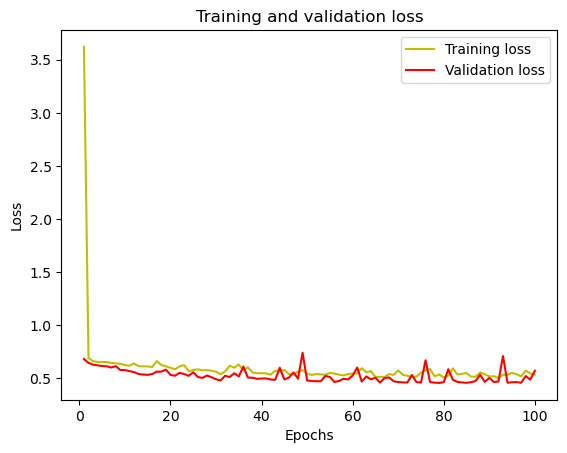

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

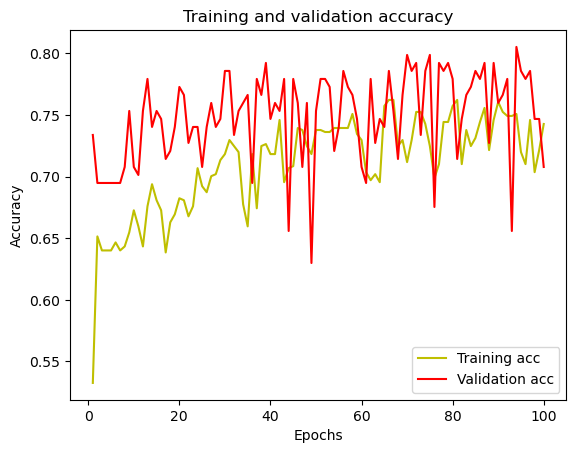

In [45]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()